# **Bismi Allah**

# **Projet d'ARN de fin de semestre** (SUITE 2/3)


        Travail réalisé par le binôme : 
            - SAYOUD Maissa 191931040670
            - BOULKABOUL Amira 202031043294

    Etudiantes en M1 SII Groupe 02

            


In [3]:
import pandas as pd

import numpy as np

# pour visualisation et figures 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk


# pour compter les occurences des éléments
from collections import defaultdict
from collections import Counter

# pour la vectorisation  (representation binaire et par comptage)
from sklearn.feature_extraction.text import CountVectorizer




In [4]:
data = pd.read_csv("sentiment140_preprocessed.csv", 
                   skiprows=1, 
                   names=["target", "tweet"])


In [5]:
print(data.shape)

(1600000, 2)


supprimer les tweets vides (lignes NAN) pour eviter les erreurs et optimiser le traitement

In [6]:
data.dropna(how='any', inplace=True)
data.shape

(1588611, 2)

In [7]:
# Enregistrer le NOUVEAU datset dans un fichier csv
data.to_csv("sentiment140_preprocessed_reduced.csv", index=False)

## **A. Visualisation de données nettoyées**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_604\2909927930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x= 'target', palette=custom_palette)


Text(0.5, 1.0, 'Sentiment Field Distribution after cleaning\n0    794835\n1    793776')

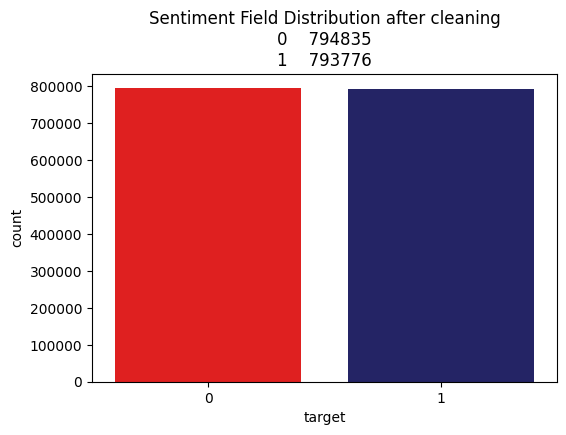

In [8]:
val_count=data["target"].value_counts()
custom_palette = ["#FF0000", "#191970"]
plt.figure(figsize= (6,4))
sns.countplot(data = data, x= 'target', palette=custom_palette)
plt.title(f'Sentiment Field Distribution after cleaning\n{val_count.to_string(index=True, header=None)}')

Visualiser quelques mots positifs :


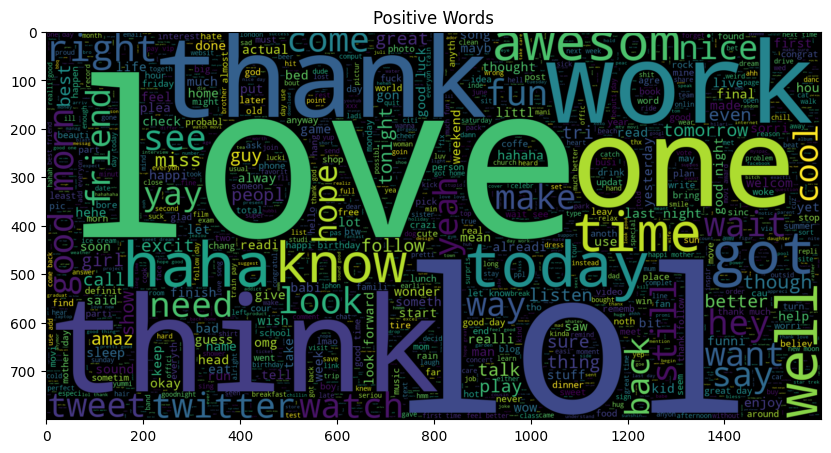

In [9]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 1].tweet))
plt.title("Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

Visualiser quelques mots négatifs

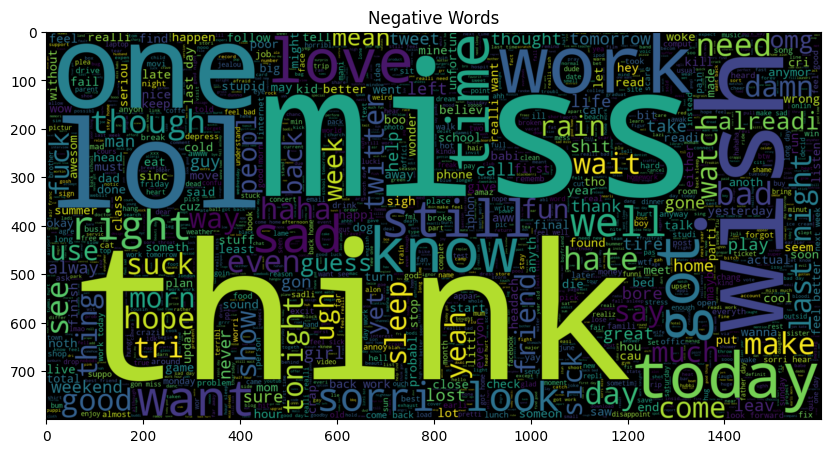

In [10]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.target == 0].tweet))
plt.title("Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

## **B. Construction du vocabulaire**

Choisir les mots que nous aimerions utiliser dans notre classificateur et que nous voudrions laisser de côté.

La liste complète du vocabulaire devra être sauvegardée dans un fichier, exemple vocab.txt.

Dans cette liste de vocabulaire seulement les mots qui apparaissent au moins K fois dans le corpus de tweets devront être gardés. K devra être choisi empiriquement.

In [11]:
K = 7777

word_counts = defaultdict(int)

for tweet in data["tweet"]:
    # Vérifier si le tweet est une chaîne de caractères
    # pour eviter l'erreur de "float" des tweets vides qui ont NAN comme valeur !
    if isinstance(tweet, str):
        words = tweet.split()
        for word in words:
            word_counts[word] += 1


# Filtrer les mots qui apparaissent au moins K fois et les trier par occurrence
filtered_words = {word: count for word, count in sorted(word_counts.items(), key=lambda item: item[1], reverse=True) if count >= K}


with open("vocab_occ.txt", "w", encoding="utf-8") as file:
    for word, count in filtered_words.items():
        file.write(f"{word}: {count}\n")

with open("vocab.txt", "w", encoding="utf-8") as file:
    for word, count in filtered_words.items():
        file.write(f"{word}\n")



## Visualisation des mots les plus fréquents du vocabulaires

In [12]:
freq = nltk.FreqDist(filtered_words)
d = pd.DataFrame({'frequent words': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,frequent words,Count
0,get,110828
1,day,109060
2,good,92531
3,work,87781
4,like,83826


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_604\3441285916.py:6: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=d, x='Count', y='frequent words', hue='frequent words', palette=custom_palette, dodge=False)


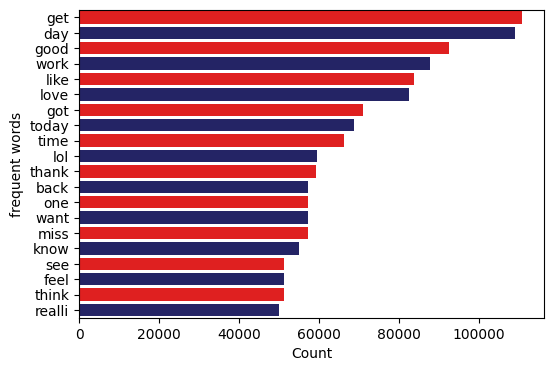

In [15]:
# Sélectionner les 20 mots les plus fréquents
d = d.nlargest(columns='Count', n=20)

# Tracer le graphique à barres avec la palette de couleurs personnalisée
plt.figure(figsize=(6, 4))
sns.barplot(data=d, x='Count', y='frequent words', hue='frequent words', palette=custom_palette, dodge=False)
plt.legend([],[], frameon=False)  # Masquer la légende
plt.show()


### Mappage des données aux indices dans le vocabulaire
mapper chaque mot dans le tweet prétraité à son index dans une liste d'index de mots (qui contient l'index du mot dans la liste de vocabulaire)
Ceci est fait en cherchant le mot dans la liste de vocabulaire et trouver si le mot existe. Si oui, il devra être ajouté dans la variable index des mots. Si le mot n'existe pas, et n'est donc pas dans le vocabulaire, le mot devra être ignoré.

In [16]:
with open("vocab.txt", "r", encoding="utf-8") as file:
    vocabulary = [line.split()[0] for line in file]

tweets_word_indices = []

for tweet in data["tweet"]:
    # Vérifier si le tweet est une chaîne de caractères non vide et non pas une valeur float de NAN.
    if isinstance(tweet, str):
        word_indices = []
        for word in tweet.split():
            # Vérifier si le mot existe dans le vocabulaire
            if word in vocabulary:
                # Trouver l'index du mot dans le vocabulaire 
                word_index = vocabulary.index(word)
                word_indices.append(word_index)
        # Ajouter la liste d'index de mots du tweet à la liste des index de mots des tweets
        tweets_word_indices.append(word_indices)
    else:
        # Si le tweet n'est pas une chaîne de caractères, ajouter une liste vide à la liste des index de mots des tweets
        tweets_word_indices.append([])


In [17]:
# Apperçu sur la liste des indices des mots 
print("Indices des mots du tweet N° 1     :", tweets_word_indices[0])
print("Indices des mots du tweet N° 89405 :", tweets_word_indices[89405])


Indices des mots du tweet N° 1     : [6, 1]
Indices des mots du tweet N° 89405 : [23, 32, 41, 60, 76]


## **C. Extraction de caractéristiques**

In [18]:
# Charger le vocabulaire à partir du fichier vocab.txt

with open("vocab.txt", "r", encoding="utf-8") as file:
    vocabulary = [line.strip() for line in file]



### 1. Représentation binaire des caractéristiques
la caractéristique 𝑥􀯜 ∈ {0,1} d'un tweet correspond à
savoir si le i-ème mot du dictionnaire apparaît dans le tweet. Autrement dit, 𝑥􀯜 = 1 si le i-ème mot est
dans le tweet et 𝑥􀯜 = 0 si le i-ème mot n'est pas présent dans le tweet.

### 2. Représentation des caractéristiques par comptage
la caractéristique 𝑥􀯜 ∈ {0, . . , 𝑚} d'un tweet correspond au nombre d’apparitions du i-ème mot du dictionnaire dans le tweet.

In [19]:
# Fonction pour transformer les tweets en vecteurs de caractéristiques
def create_feature_vectors(tweets, vocabulary):
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    # Représentation par comptage
    count_features = vectorizer.fit_transform(tweets)
    count_df = pd.DataFrame(count_features.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Représentation binaire
    binary_features = count_features.copy()
    binary_features[binary_features > 0] = 1
    binary_df = pd.DataFrame(binary_features.toarray(), columns=vectorizer.get_feature_names_out())
    
    return binary_df, count_df



In [20]:
binary_df, count_df = create_feature_vectors(data['tweet'], vocabulary)


# Sauvegarder les resultats dans des fichiers CSV :
binary_df.to_csv("binary_features.csv", index=False)
count_df.to_csv("count_features.csv", index=False)


# Annoncer la fin du traitement

In [37]:
import winsound
import time

frequency = 300  
duration = 1000  # 1 second

winsound.Beep(frequency, duration)
winsound.Beep(frequency+200, duration)
winsound.Beep(frequency, duration)


Veuillez trouvez la suite du programme dans le fichier projet3.ipynb